In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("./datasets/titanic/train.csv")
test_data = pd.read_csv("./datasets/titanic/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId : id
- Survived : 예측변수. no = 0, yes = 1
- Pclass : 좌석 등급. 1,2,3
- Name, Sex, Age
- SisSp : 함께 탑승한 형제, 배우자 수
- Parch : 함께 탑승한 부모, 자녀 수
- Ticket : 티켓 번호
- Fare : 운임
- Cabin : 선실
- Embarked : 승선 항구

#### to check
- Name에 sex, age 관련 -> miss, mr. 
- Fare와 Pclass 관련
- Embarked와 Fare 관련
- age band

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- Survived : 3:2 비율
- Pclass : 50%가 넘는 사람들이 3등급
- age 밴드로 나누는 것이 좋아보이고.

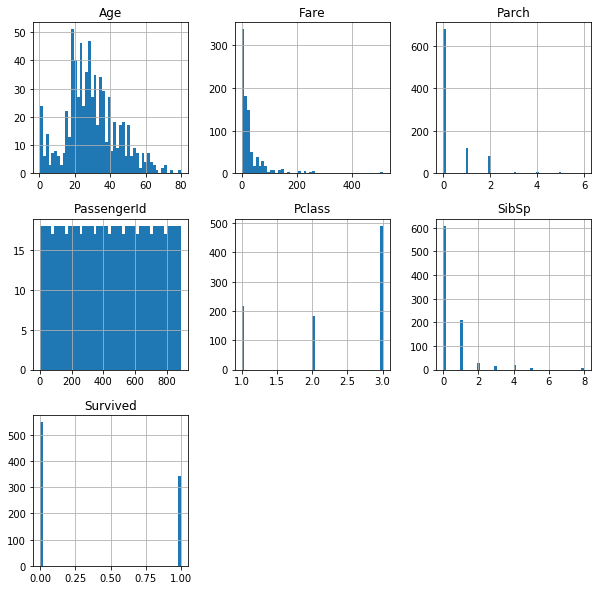

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(10,10))
plt.show()

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [16]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [17]:
train_data["Ticket"].value_counts().sort_values(ascending=False).head()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
Name: Ticket, dtype: int64

In [18]:
train_data["Cabin"].value_counts().sort_values(ascending=False).head()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
F33            3
Name: Cabin, dtype: int64

- Ticket, Cabin은 엉망이라 제외

In [19]:
train_data["Name"].value_counts().sort_values(ascending=False).head()

Coleff, Mr. Satio                                   1
Guggenheim, Mr. Benjamin                            1
Nicholson, Mr. Arthur Ernest                        1
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)    1
Torber, Mr. Ernst William                           1
Name: Name, dtype: int64

In [20]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 전처리 파이프라인

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ('imputer_median', SimpleImputer(strategy="median"))
])

In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(["Pclass","Sex", "Embarked"])),
    ('imputer_frequent', SimpleImputer(strategy="most_frequent")),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

In [25]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [26]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [28]:
y_train = train_data["Survived"]

## 모델 훈련

In [29]:
# 잘 섞여있어서 별 차이는 없었음.
import numpy as np
X_train_shuffled = X_train.copy()
y_train_shuffled = y_train.copy()
shuffle_idx = np.random.permutation(len(X_train_shuffled))
X_train_shuffled = X_train_shuffled[shuffle_idx]
y_train_shuffled = y_train_shuffled[shuffle_idx]

In [80]:
# 예측변수 클래스 해당 샘플 개수가 동일하지 않으므로 계층 샘플링
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfolds = KFold(n_splits=10, random_state=44)
skfolds = StratifiedKFold(n_splits=10, random_state=44)

In [81]:
from sklearn.ensemble import RandomForestClassifier
rdf_clf = RandomForestClassifier()
rdf_scores = cross_val_score(rdf_clf, X_train_shuffled, y_train_shuffled, cv=kfolds, scoring="accuracy")
rdf_scores

array([0.77777778, 0.86516854, 0.92134831, 0.79775281, 0.78651685,
       0.83146067, 0.74157303, 0.70786517, 0.78651685, 0.86516854])

In [82]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_scores = cross_val_score(sgd_clf, X_train_shuffled, y_train_shuffled, cv=kfolds, scoring="accuracy")
sgd_scores

array([0.61111111, 0.7752809 , 0.6741573 , 0.7752809 , 0.70786517,
       0.82022472, 0.62921348, 0.76404494, 0.57303371, 0.64044944])

In [83]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train_shuffled, y_train_shuffled, cv=kfolds, scoring="accuracy")
svm_scores

array([0.64444444, 0.79775281, 0.80898876, 0.83146067, 0.73033708,
       0.71910112, 0.66292135, 0.61797753, 0.70786517, 0.74157303])

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_shuffled, y_train_shuffled, cv=kfolds, scoring="accuracy")
knn_scores

array([0.64444444, 0.79775281, 0.79775281, 0.80898876, 0.74157303,
       0.68539326, 0.62921348, 0.60674157, 0.7752809 , 0.68539326])

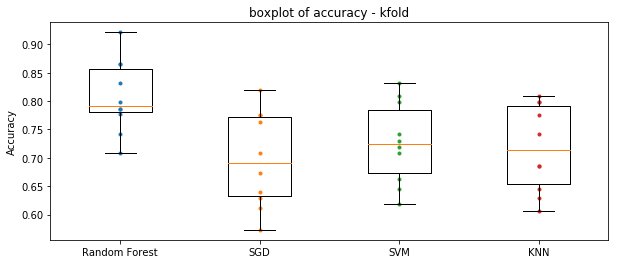

In [85]:
plt.figure(figsize=(10,4))
scores_list = [rdf_scores, sgd_scores, svm_scores, knn_scores]
for i in range(len(scores_list)):
    plt.plot([i+1]*10, scores_list[i], ".")
plt.boxplot(scores_list, labels=("Random Forest", "SGD", "SVM", "KNN"))
plt.ylabel("Accuracy")
plt.title("boxplot of accuracy - kfold")
plt.show()

In [86]:
from sklearn.ensemble import RandomForestClassifier
rdf_clf = RandomForestClassifier()
rdf_scores = cross_val_score(rdf_clf, X_train_shuffled, y_train_shuffled, cv=skfolds, scoring="accuracy")
rdf_scores

array([0.77777778, 0.8988764 , 0.88764045, 0.80898876, 0.78651685,
       0.82022472, 0.73033708, 0.69662921, 0.80898876, 0.88764045])

In [87]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_scores = cross_val_score(sgd_clf, X_train_shuffled, y_train_shuffled, cv=skfolds, scoring="accuracy")
sgd_scores

array([0.58888889, 0.85393258, 0.85393258, 0.75280899, 0.75280899,
       0.78651685, 0.62921348, 0.68539326, 0.61797753, 0.76404494])

In [88]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train_shuffled, y_train_shuffled, cv=skfolds, scoring="accuracy")
svm_scores

array([0.65555556, 0.79775281, 0.84269663, 0.78651685, 0.74157303,
       0.74157303, 0.62921348, 0.64044944, 0.74157303, 0.73033708])

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_shuffled, y_train_shuffled, cv=skfolds, scoring="accuracy")
knn_scores

array([0.66666667, 0.7752809 , 0.79775281, 0.78651685, 0.71910112,
       0.73033708, 0.58426966, 0.61797753, 0.7752809 , 0.6741573 ])

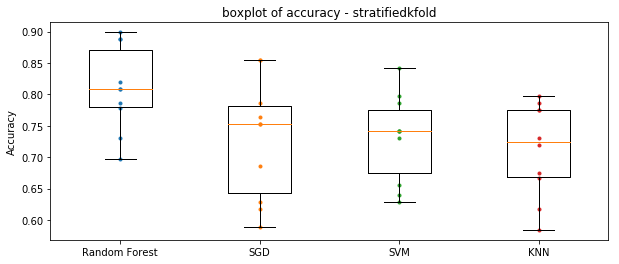

In [90]:
plt.figure(figsize=(10,4))
scores_list = [rdf_scores, sgd_scores, svm_scores, knn_scores]
for i in range(len(scores_list)):
    plt.plot([i+1]*10, scores_list[i], ".")
plt.boxplot(scores_list, labels=("Random Forest", "SGD", "SVM", "KNN"))
plt.ylabel("Accuracy")
plt.title("boxplot of accuracy - stratifiedkfold")
plt.show()

## 모델 세부 튜닝

In [50]:
from sklearn.model_selection import GridSearchCV

In [123]:
rdf_param_grid = [{
    'n_estimators':[25,50,75,100,200,400,600,800],
    'criterion':["gini", "entropy"]
}]

rdf_grid = GridSearchCV(rdf_clf, rdf_param_grid, cv=4, scoring="accuracy")
rdf_grid.fit(X_train_shuffled, y_train_shuffled)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [124]:
rdf_grid.best_params_

{'criterion': 'entropy', 'n_estimators': 400}

In [125]:
rdf_result = pd.DataFrame(rdf_grid.cv_results_)
rdf_result[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

,mean_test_score,params
13,0.818204,"{'n_estimators': 400, 'criterion': 'entropy'}"
3,0.818199,"{'n_estimators': 100, 'criterion': 'gini'}"
5,0.817073,"{'n_estimators': 400, 'criterion': 'gini'}"
11,0.815952,"{'n_estimators': 100, 'criterion': 'entropy'}"
14,0.814836,"{'n_estimators': 600, 'criterion': 'entropy'}"
15,0.814836,"{'n_estimators': 800, 'criterion': 'entropy'}"
4,0.814825,"{'n_estimators': 200, 'criterion': 'gini'}"
10,0.813709,"{'n_estimators': 75, 'criterion': 'entropy'}"
6,0.813704,"{'n_estimators': 600, 'criterion': 'gini'}"
2,0.813699,"{'n_estimators': 75, 'criterion': 'gini'}"


In [ ]:
svm_param_grid

In [111]:
knn_param_grid = [{
    'weights':['uniform', 'distance'],
    'n_neighbors':[2,3,4,5,6,7,8,9,10]
}]

knn_grid = GridSearchCV(knn_clf, knn_param_grid, cv=4, scoring="accuracy", return_train_score=True)
knn_grid.fit(X_train_shuffled, y_train_shuffled)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [112]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [113]:
knn_result = pd.DataFrame(knn_grid.cv_results_)
knn_result[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

,mean_test_score,params
13,0.735138,"{'n_neighbors': 8, 'weights': 'distance'}"
9,0.732881,"{'n_neighbors': 6, 'weights': 'distance'}"
15,0.730649,"{'n_neighbors': 9, 'weights': 'distance'}"
11,0.729538,"{'n_neighbors': 7, 'weights': 'distance'}"
7,0.726144,"{'n_neighbors': 5, 'weights': 'distance'}"
17,0.725013,"{'n_neighbors': 10, 'weights': 'distance'}"
5,0.721655,"{'n_neighbors': 4, 'weights': 'distance'}"
2,0.719398,"{'n_neighbors': 3, 'weights': 'uniform'}"
10,0.717145,"{'n_neighbors': 7, 'weights': 'uniform'}"
3,0.716050,"{'n_neighbors': 3, 'weights': 'distance'}"
